In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [16]:
df = pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")
df.head()



,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [17]:
df.shape


(7043, 21)

In [18]:
df.columns


Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [19]:
df.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [21]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')


In [22]:
df['TotalCharges'].dtype


dtype('float64')

In [23]:
df.isnull().sum()


customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [25]:
df['TotalCharges'] = df['TotalCharges'].fillna(df['TotalCharges'].median())



In [26]:
df.isnull().sum()


customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [27]:
df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})


In [28]:
churn_rate = df['Churn'].mean() * 100
print("Overall Churn Rate:", round(churn_rate, 2), "%")


Overall Churn Rate: 26.54 %


In [29]:
total_customers = df.shape[0]
churned_customers = df['Churn'].sum()

print("Total Customers:", total_customers)
print("Customers Who Left:", churned_customers)


Total Customers: 7043
Customers Who Left: 1869


In [30]:
pd.crosstab(df['Contract'], df['Churn'], normalize='index') * 100


Churn,0,1
Contract,,
Month-to-month,57.290323,42.709677
One year,88.730482,11.269518
Two year,97.168142,2.831858


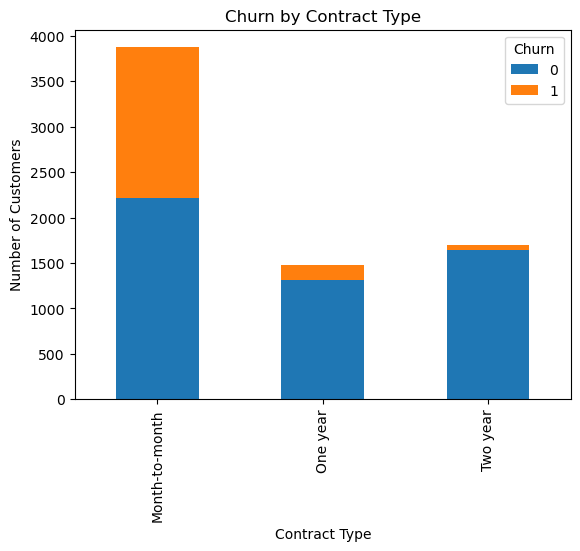

In [31]:
contract_churn = pd.crosstab(df['Contract'], df['Churn'])
contract_churn.plot(kind='bar', stacked=True)

plt.title("Churn by Contract Type")
plt.xlabel("Contract Type")
plt.ylabel("Number of Customers")
plt.show()


In [33]:
df['tenure_group'] = pd.cut(
    df['tenure'],
    bins=[0,12,24,36,48,60,72],
    labels=['0-1y','1-2y','2-3y','3-4y','4-5y','5-6y']
)


In [34]:
pd.crosstab(df['tenure_group'], df['Churn'], normalize='index') * 100


Churn,0,1
tenure_group,,
0-1y,52.321839,47.678161
1-2y,71.289062,28.710938
2-3y,78.365385,21.634615
3-4y,80.971129,19.028871
4-5y,85.576923,14.423077
5-6y,93.390192,6.609808


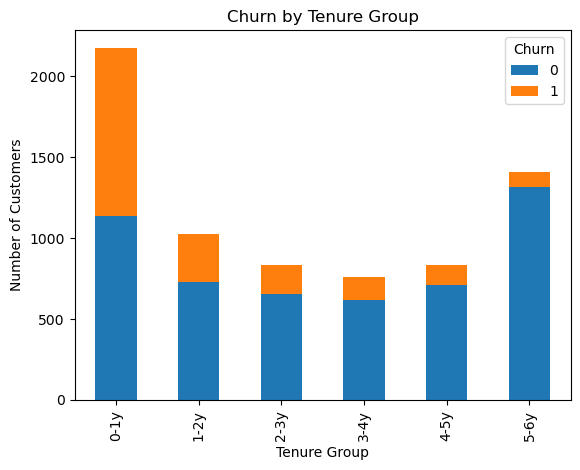

In [35]:
tenure_churn = pd.crosstab(df['tenure_group'], df['Churn'])
tenure_churn.plot(kind='bar', stacked=True)

plt.title("Churn by Tenure Group")
plt.xlabel("Tenure Group")
plt.ylabel("Number of Customers")
plt.show()


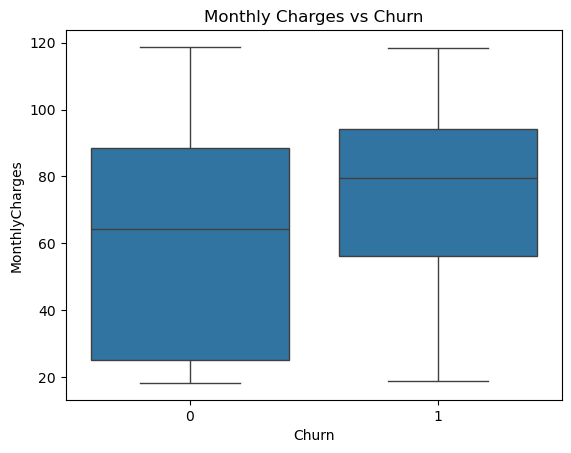

In [36]:
import seaborn as sns

sns.boxplot(x='Churn', y='MonthlyCharges', data=df)
plt.title("Monthly Charges vs Churn")
plt.show()


### Monthly Charges vs Churn Insight

- Customers who churn tend to have higher monthly charges.
- Pricing sensitivity may be contributing to churn.
- High-cost plans should be evaluated for better value perception.


In [37]:
pd.crosstab(df['PaymentMethod'], df['Churn'], normalize='index') * 100


Churn,0,1
PaymentMethod,,
Bank transfer (automatic),83.290155,16.709845
Credit card (automatic),84.756899,15.243101
Electronic check,54.714588,45.285412
Mailed check,80.893300,19.106700


## Payment Method vs Churn Analysis

### Objective:
To understand whether payment type influences customer churn behavior.

### Why This Matters:
Payment friction or inconvenience can increase churn risk.
Auto-payment methods typically reduce churn.


In [38]:
pd.crosstab(df['InternetService'], df['Churn'], normalize='index') * 100


Churn,0,1
InternetService,,
DSL,81.040892,18.959108
Fiber optic,58.107235,41.892765
No,92.595020,7.404980


## Internet Service vs Churn Analysis

### Objective:
To examine whether type of internet service affects churn.

### Why This Matters:
Service quality and speed directly impact customer satisfaction.
Poor service experience can increase churn.


In [39]:
pd.crosstab(df['TechSupport'], df['Churn'], normalize='index') * 100


Churn,0,1
TechSupport,,
No,58.364526,41.635474
No internet service,92.595020,7.404980
Yes,84.833659,15.166341


## Tech Support vs Churn Analysis

### Objective:
To understand whether access to technical support affects customer churn.

### Why This Matters:
Customers without support may feel unresolved issues,
leading to dissatisfaction and churn.


In [40]:
revenue_lost = df[df['Churn'] == 1]['MonthlyCharges'].sum()

print("Total Monthly Revenue Lost Due to Churn: $", round(revenue_lost, 2))


Total Monthly Revenue Lost Due to Churn: $ 139130.85


## Revenue Impact of Churn

### Observation:
The company is losing significant recurring monthly revenue due to churn.

### Business Impact:
High churn directly affects revenue stability and growth.

### Recommendation:
Reducing churn by even 5% could significantly improve profitability.


# Final Business Insights – Customer Churn Analysis

## Key Findings:

1. Overall churn rate is 26.54%, which is significantly high.
2. Month-to-month contracts show the highest churn (42.7%).
3. Nearly 48% of customers leave within the first year.
4. Customers with higher monthly charges are more likely to churn.
5. Lack of long-term contracts increases churn risk.

---

## Root Causes Identified:

- Short-term contracts allow easy exit.
- Poor first-year customer experience.
- Price sensitivity among high-paying customers.
- Limited engagement with new customers.

---

## Strategic Recommendations:

1. Offer discounts for upgrading to 1-year or 2-year contracts.
2. Improve onboarding process during the first 6–12 months.
3. Introduce loyalty rewards after 12 months.
4. Provide bundled pricing for high monthly charge customers.
5. Run targeted retention campaigns for month-to-month customers.

---

## Business Impact:

Reducing churn by even 5% could significantly increase recurring revenue and improve customer lifetime value.



df.to_csv("clean_telco_churn.csv", index=False)


In [43]:
df.to_csv("clean_telco_churn.csv", index=False)
